[A conceptual guide](https://towardsdatascience.com/intro-to-gaussian-process-regression-14f7c647d74d)

[Introduction to Gaussian process regression](https://medium.com/data-science-at-microsoft/introduction-to-gaussian-process-regression-part-1-the-basics-3cb79d9f155f)

[Quick Start to Gaussian Process Regression](https://towardsdatascience.com/quick-start-to-gaussian-process-regression-36d838810319)

[Using Gaussian Process Regression as a Generative Model](https://towardsdatascience.com/using-gaussian-process-regression-as-a-generative-model-using-python-66278a154eb5)

In [1]:
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_boston(return_X_y= True)

/home/drclab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
kernel = ConstantKernel(constant_value=1) + ConstantKernel(1.0)*RBF(10) + WhiteKernel(5)

In [5]:
model = GaussianProcessRegressor(kernel=kernel)

In [6]:
model.fit(X = X_train, y=y_train)

/home/drclab/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 + 1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=5))

In [7]:
y_p_train, y_p_std_train = model.predict(X_train, return_std=True)

In [8]:
model.kernel

1**2 + 1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=5)

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, '$y$')

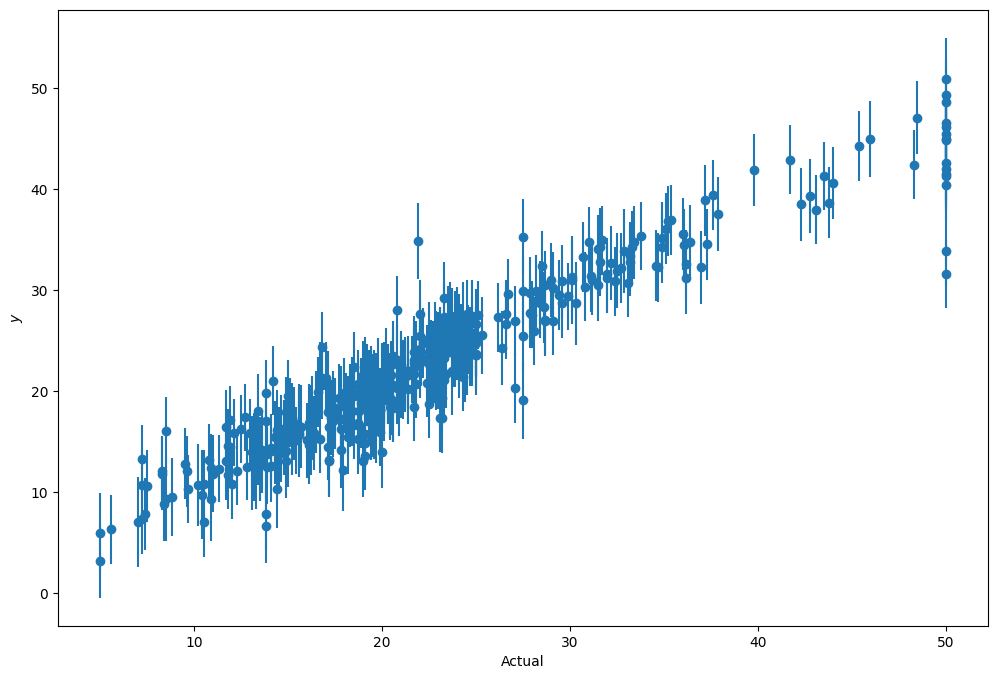

In [10]:
plt.figure(figsize=(12,8))
plt.errorbar(y_train, y_p_train, yerr=y_p_std_train, fmt='o')
plt.xlabel("Actual")
plt.ylabel(r"$y$")